# Loading Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Collection of data

In [2]:
dataframe = pd.read_csv('./Data_Breach_Notifications_Affecting_Washington_Residents (3).csv')

In [3]:
dataframe

,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,...,BreachLifecycleRange,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange
0,03/28/2018 12:00:00 AM,04-11-18 0:00,Cyberattack,09/26/2017 12:00:00 AM,10-12-17 0:00,Delta Airlines,9561,Malware,24563.0,Business,...,100-199,0.0,183.0,183.0,False,16.0,167.0,False,14.0,Jan-99
1,03/28/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Cyberattack,09/26/2017 12:00:00 AM,10-12-17 0:00,"Best Buy Co, Inc.",9562,Malware,8390.0,Business,...,100-199,0.0,183.0,183.0,False,16.0,167.0,False,16.0,Jan-99
2,03/14/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Unauthorized Access,NaN,NaN,Inogen Inc.,9563,NaN,518.0,Health,...,Unknown,NaN,NaN,NaN,False,NaN,NaN,False,30.0,Unknown
3,03/15/2018 12:00:00 AM,04/24/2018 12:00:00 AM,Cyberattack,09/27/2017 12:00:00 AM,10-12-17 0:00,Sears Holdings,9565,Malware,2373.0,Business,...,100-199,0.0,169.0,169.0,False,15.0,154.0,False,40.0,Jan-99
4,03/29/2018 12:00:00 AM,04/26/2018 12:00:00 AM,Cyberattack,07-01-17 0:00,03/31/2018 12:00:00 AM,Hudson's Bay Company,9566,Malware,NaN,Business,...,200-299,2.0,271.0,273.0,True,273.0,NaN,False,28.0,200-299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,07-11-22 0:00,10/25/2022 12:00:00 AM,Cyberattack,07-09-22 0:00,07-11-22 0:00,Providence WA Anesthesia Services PC,14086,Ransomware,56578.0,Health,...,Jan-99,0.0,2.0,2.0,True,2.0,NaN,True,106.0,Jan-99
963,01-06-22 0:00,10/19/2022 12:00:00 AM,Cyberattack,10/14/2022 12:00:00 AM,10/14/2022 12:00:00 AM,Country Doctor Community Health Clinic,13950,Ransomware,21600.0,Health,...,0,281.0,-281.0,0.0,True,0.0,NaN,False,286.0,0
964,04/26/2022 12:00:00 AM,10-10-22 0:00,Theft or Mistake,03/30/2022 12:00:00 AM,04/25/2022 12:00:00 AM,Bellevue School District No. 405,13925,NaN,573.0,Education,...,Jan-99,0.0,27.0,27.0,False,26.0,1.0,False,167.0,Jan-99
965,09/29/2022 12:00:00 AM,10/17/2022 12:00:00 AM,Cyberattack,09/28/2022 12:00:00 AM,09/28/2022 12:00:00 AM,North Pacific Paper Company,13902,Ransomware,972.0,Business,...,Jan-99,0.0,1.0,1.0,False,0.0,1.0,False,18.0,0


# Performing Exploratory Data Analysis

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DateAware                          943 non-null    object 
 1   DateSubmitted                      967 non-null    object 
 2   DataBreachCause                    967 non-null    object 
 3   DateStart                          839 non-null    object 
 4   DateEnd                            781 non-null    object 
 5   Name                               967 non-null    object 
 6   Id                                 967 non-null    int64  
 7   CyberattackType                    627 non-null    object 
 8   WashingtoniansAffected             935 non-null    float64
 9   IndustryType                       967 non-null    object 
 10  BusinessType                       458 non-null    object 
 11  Year                               967 non-null    int64  

# Data Cleaning

### Checking for Null values

In [5]:
dataframe.isna().sum()

DateAware                             24
DateSubmitted                          0
DataBreachCause                        0
DateStart                            128
DateEnd                              186
Name                                   0
Id                                     0
CyberattackType                      340
WashingtoniansAffected                32
IndustryType                           0
BusinessType                         509
Year                                   0
YearText                               0
WashingtoniansAffectedRange            0
BreachLifecycleRange                   0
DaysToContainBreach                  203
DaysToIdentifyBreach                 148
DaysBreachLifecycle                  221
DiscoveredInProgress                   0
DaysOfExposure                       204
DaysElapsedBetweenEndAndDiscovery    580
EndedOnDayDiscovered                   0
DaysElapsedBeforeNotification         24
DaysOfExposureRange                    0
dtype: int64

### Removal of Null values

In [6]:
dataframe = dataframe.dropna()

In [7]:
dataframe.describe()

,Id,WashingtoniansAffected,Year,YearText,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,DaysElapsedBeforeNotification
count,104.000000,104.000000,104.00000,104.00000,104.0,104.000000,104.000000,104.000000,104.000000,104.000000
mean,11633.269231,5641.413462,2020.50000,2020.50000,0.0,246.980769,246.980769,182.653846,64.326923,69.923077
std,2118.915542,18170.540753,2.39741,2.39741,0.0,241.968063,241.968063,214.426250,84.209568,86.322346
min,9561.000000,505.000000,2016.00000,2016.00000,0.0,1.000000,1.000000,0.000000,1.000000,2.000000
25%,9726.750000,770.000000,2018.00000,2018.00000,0.0,46.250000,46.250000,9.000000,14.250000,25.750000
50%,10572.500000,1147.500000,2021.00000,2021.00000,0.0,183.000000,183.000000,104.500000,37.500000,41.500000
75%,13678.750000,4348.500000,2023.00000,2023.00000,0.0,346.000000,346.000000,283.000000,82.500000,81.750000
max,15585.000000,153800.000000,2024.00000,2024.00000,0.0,1346.000000,1346.000000,1309.000000,678.000000,525.000000


In [8]:
dataframe.duplicated().sum()

0

In [9]:
dataframe.dtypes

DateAware                             object
DateSubmitted                         object
DataBreachCause                       object
DateStart                             object
DateEnd                               object
Name                                  object
Id                                     int64
CyberattackType                       object
WashingtoniansAffected               float64
IndustryType                          object
BusinessType                          object
Year                                   int64
YearText                               int64
WashingtoniansAffectedRange           object
BreachLifecycleRange                  object
DaysToContainBreach                  float64
DaysToIdentifyBreach                 float64
DaysBreachLifecycle                  float64
DiscoveredInProgress                    bool
DaysOfExposure                       float64
DaysElapsedBetweenEndAndDiscovery    float64
EndedOnDayDiscovered                    bool
DaysElapse

# Analysis and Visualisation

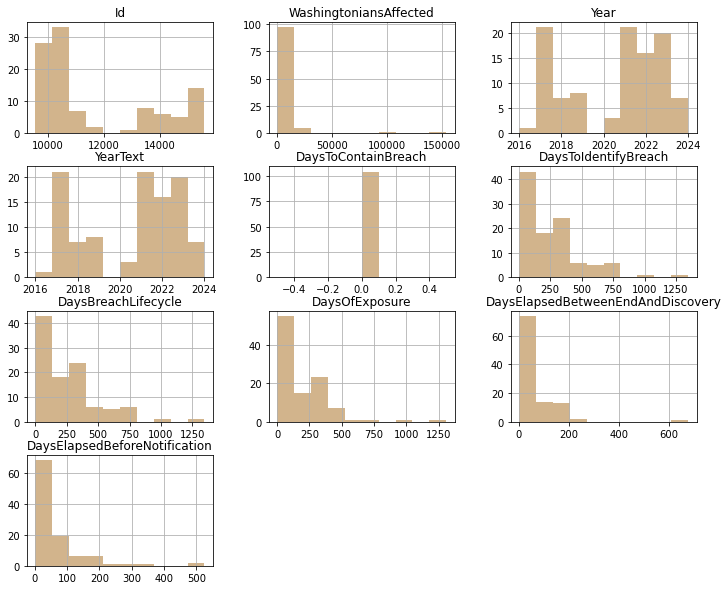

In [10]:
dataframe.hist(figsize=(12,10),color='tan')
plt.show()

In [11]:
dataframe['DataBreachCause'].value_counts()

Cyberattack    104
Name: DataBreachCause, dtype: int64

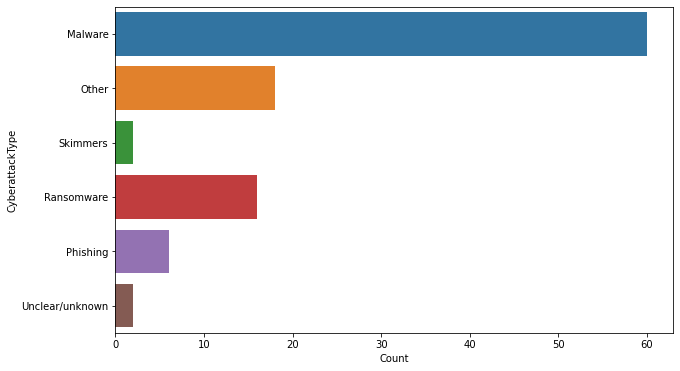

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(y='CyberattackType', data=dataframe)
plt.xlabel('Count')
plt.ylabel('CyberattackType')
plt.show()

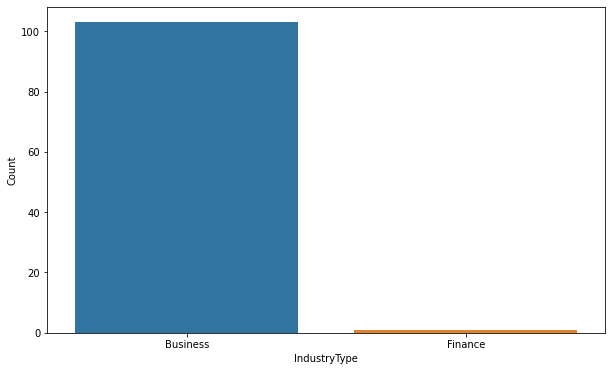

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='IndustryType', data=dataframe)
plt.ylabel('Count')
plt.xlabel('IndustryType')
plt.show()

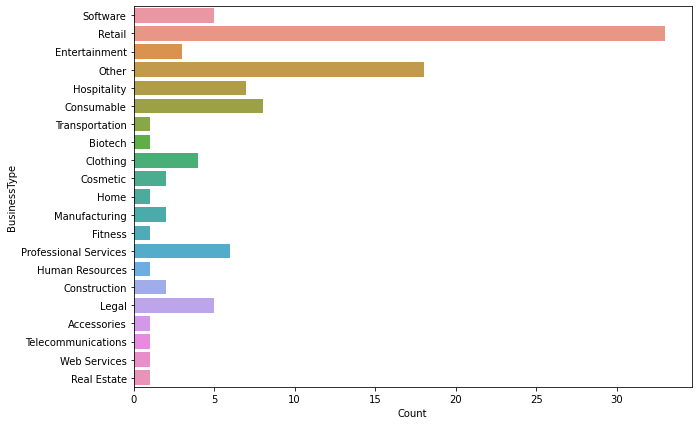

In [14]:
plt.figure(figsize=(10, 7))
sns.countplot(y='BusinessType', data=dataframe)
plt.xlabel('Count')
plt.ylabel('BusinessType')
plt.show()

In [15]:
dataframe[['DataBreachCause', 'CyberattackType', 'IndustryType', 'BusinessType', 'BreachLifecycleRange', 'DiscoveredInProgress', 'EndedOnDayDiscovered']] = dataframe[['DataBreachCause', 'CyberattackType', 'IndustryType', 'BusinessType', 'BreachLifecycleRange', 'DiscoveredInProgress', 'EndedOnDayDiscovered']].apply(lambda col:pd.Categorical(col).codes)

In [16]:
dataframe.dtypes

DateAware                             object
DateSubmitted                         object
DataBreachCause                         int8
DateStart                             object
DateEnd                               object
Name                                  object
Id                                     int64
CyberattackType                         int8
WashingtoniansAffected               float64
IndustryType                            int8
BusinessType                            int8
Year                                   int64
YearText                               int64
WashingtoniansAffectedRange           object
BreachLifecycleRange                    int8
DaysToContainBreach                  float64
DaysToIdentifyBreach                 float64
DaysBreachLifecycle                  float64
DiscoveredInProgress                    int8
DaysOfExposure                       float64
DaysElapsedBetweenEndAndDiscovery    float64
EndedOnDayDiscovered                    int8
DaysElapse

In [17]:
dataframe = dataframe.drop(['DateAware', 'DateSubmitted', 'DateStart', 'DateEnd', 'Name', 'WashingtoniansAffectedRange', 'DaysOfExposureRange'], axis=1)

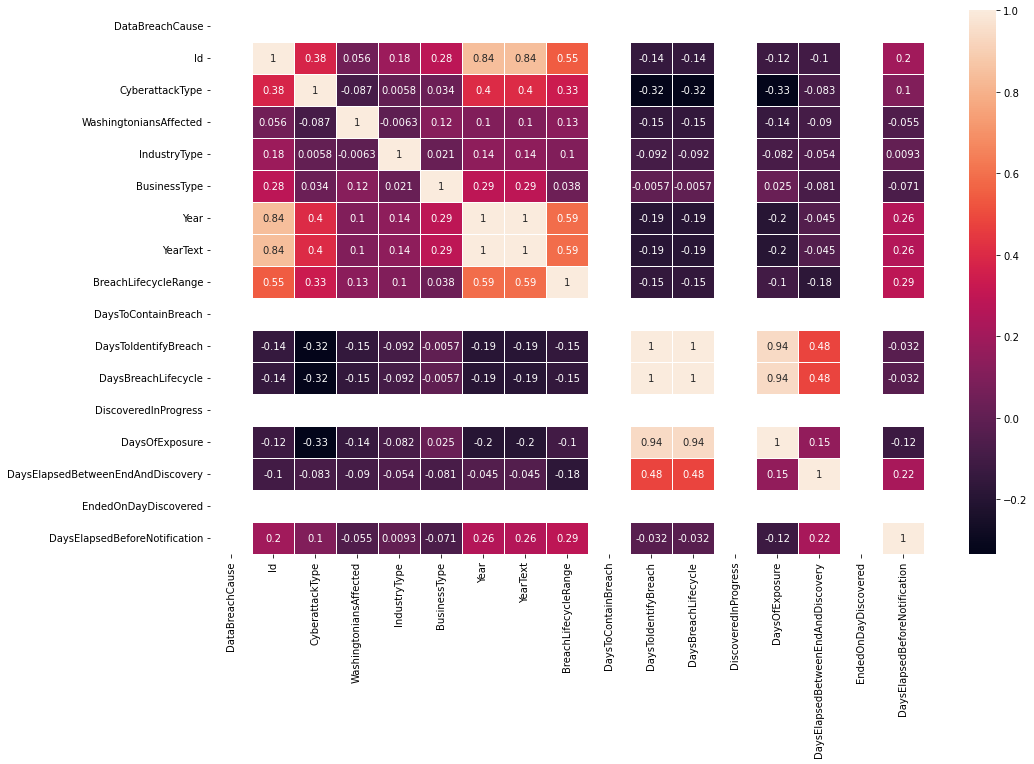

In [18]:
cor = dataframe.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor, annot= True, linewidths= 0.5)
plt.show()

# Initiating the machine learning process

In [19]:
X = dataframe.drop('CyberattackType', axis=1)
y = dataframe['CyberattackType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Implementing Random Forest Classifier

In [20]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Random Forest Classifier Accuracy: 0.71875
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.44      1.00      0.62         4
           2       0.50      0.50      0.50         2
           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.72        32
   macro avg       0.47      0.44      0.38        32
weighted avg       0.75      0.72      0.67        32



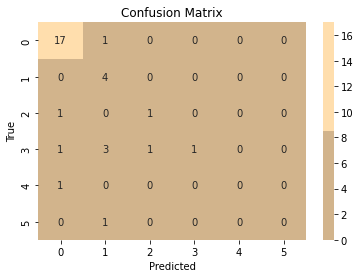

In [22]:
cm = confusion_matrix(y_test, rf_predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap=['tan','navajowhite'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

### Implementing Gradient Boosting Classifier

In [23]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [24]:
gb_predictions = gb_model.predict(X_test)
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))

Gradient Boosting Classifier Accuracy: 0.6875
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.38      0.75      0.50         4
           2       0.50      0.50      0.50         2
           3       0.50      0.17      0.25         6
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.69        32
   macro avg       0.37      0.39      0.36        32
weighted avg       0.65      0.69      0.64        32



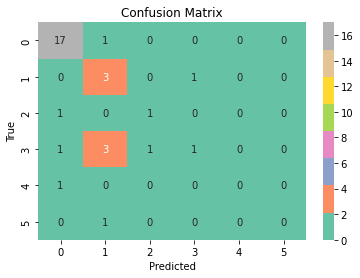

In [25]:
cm1 = confusion_matrix(y_test, gb_predictions)

sns.heatmap(cm1, annot=True, fmt='d', cmap="Set2")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Expanded Grid Search Parameters for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [4, 5, 6, 7, 8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Stratified K-Fold Cross-Validation
cv_rf = StratifiedKFold(n_splits=5)

# Grid Search CV for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                              param_grid=param_grid_rf, 
                              cv=cv_rf, 
                              verbose=2, 
                              n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
rf_best = grid_search_rf.best_estimator_
rf_predictions = rf_best.predict(X_test)
print("Enhanced Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_predictions))

Fitting 5 folds for each of 1260 candidates, totalling 6300 fits
Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Enhanced Random Forest Classifier Accuracy: 0.6875


In [32]:
# Parameters to be tested for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search CV for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), 
                              param_grid=param_grid_gb, 
                              cv=5, 
                              verbose=2, 
                              n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
gb_best = grid_search_gb.best_estimator_
gb_predictions = gb_best.predict(X_test)
print("Enhanced Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, gb_predictions))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Enhanced Gradient Boosting Classifier Accuracy: 0.6875
